# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [2]:
%pip install --upgrade plotly

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -------------------------------

## Import Statements

In [78]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [79]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [80]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [81]:
df_hh_income.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [82]:
df_hh_income.shape

(29322, 3)

In [83]:
#column names
df_hh_income.columns

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

In [84]:
print(df_fatalities.head())
print(df_fatalities.shape)
print(df_fatalities.columns)

   id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  02/01/15              shot         gun 53.00   
1   4    Lewis Lee Lembke  02/01/15              shot         gun 47.00   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed 23.00   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon 32.00   
4   9   Michael Rodriguez  04/01/15              shot    nail gun 39.00   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2 

In [85]:
print(df_pct_completed_hs.head())
print(df_pct_completed_hs.shape)
print(df_pct_completed_hs.columns)

  Geographic Area             City percent_completed_hs
0              AL       Abanda CDP                 21.2
1              AL   Abbeville city                 69.1
2              AL  Adamsville city                 78.9
3              AL     Addison town                 81.4
4              AL       Akron town                 68.6
(29329, 3)
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')


In [86]:
print(df_pct_poverty.head())
print(df_pct_poverty.shape)
print(df_pct_poverty.columns)

  Geographic Area             City poverty_rate
0              AL       Abanda CDP         78.8
1              AL   Abbeville city         29.1
2              AL  Adamsville city         25.5
3              AL     Addison town         30.7
4              AL       Akron town           42
(29329, 3)
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')


In [87]:
print(df_share_race_city.head())
print(df_share_race_city.shape)
print(df_share_race_city.columns)

  Geographic area             City share_white share_black  \
0              AL       Abanda CDP        67.2        30.2   
1              AL   Abbeville city        54.4        41.4   
2              AL  Adamsville city        52.3        44.9   
3              AL     Addison town        99.1         0.1   
4              AL       Akron town        13.2        86.5   

  share_native_american share_asian share_hispanic  
0                     0           0            1.6  
1                   0.1           1            3.1  
2                   0.5         0.3            2.3  
3                     0         0.1            0.4  
4                     0           0            0.3  
(29268, 7)
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [88]:
#checking for missing values in each dataframe
missing_hh_income = df_hh_income.isnull().sum().sum()
missing_pct_poverty = df_pct_poverty.isnull().sum().sum()
missing_pct_completed_hs = df_pct_completed_hs.isnull().sum().sum()
missing_share_race_city = df_share_race_city.isnull().sum().sum()
missing_fatalities = df_fatalities.isnull().sum().sum()

print(
    f"Missing values:\n"
    f"df_hh_income: {missing_hh_income}\n"
    f"df_pct_poverty: {missing_pct_poverty}\n"
    f"df_pct_completed_hs: {missing_pct_completed_hs}\n"
    f"df_share_race_city: {missing_share_race_city}\n"
    f"df_fatalities: {missing_fatalities}"
)

Missing values:
df_hh_income: 51
df_pct_poverty: 0
df_pct_completed_hs: 0
df_share_race_city: 0
df_fatalities: 346


In [89]:
#dealing with missing values
#replacing missing values with 0
df_hh_income = df_hh_income.fillna(0)
#df_pct_poverty = df_pct_poverty.fillna(0)

In [90]:
# checking for missing values
df_hh_income.isnull().sum()

Geographic Area    0
City               0
Median Income      0
dtype: int64

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [91]:
df_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


C:\Users\glubi\AppData\Local\Temp\ipykernel_16404\3789821709.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_poverty.values, y=state_poverty.index, palette='viridis')


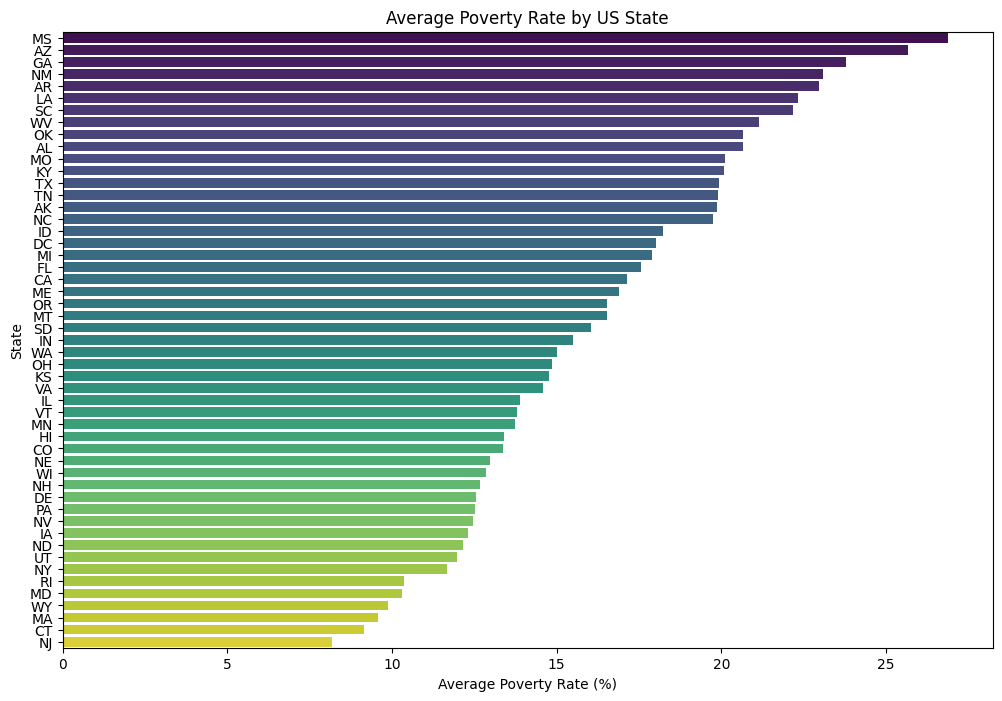

In [92]:
# Convert poverty_rate to numeric, coerce errors to NaN, then group by state and calculate mean poverty rate
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
state_poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=state_poverty.values, y=state_poverty.index, palette='viridis')
plt.title('Average Poverty Rate by US State')
plt.xlabel('Average Poverty Rate (%)')
plt.ylabel('State')
plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [93]:
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [94]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')
state_hs_completion = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values(ascending=False)

C:\Users\glubi\AppData\Local\Temp\ipykernel_16404\1197169534.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_hs_completion.values, y=state_hs_completion.index, palette='magma')


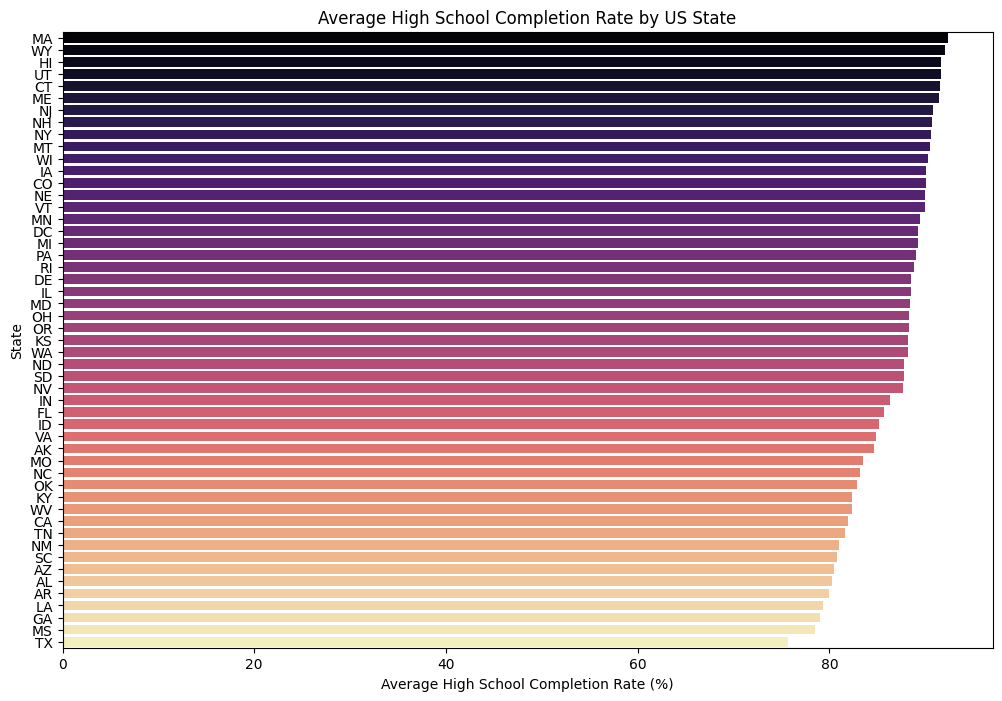

In [95]:
plt.figure(figsize=(12, 8))
sns.barplot(x=state_hs_completion.values, y=state_hs_completion.index, palette='magma')
plt.title('Average High School Completion Rate by US State')
plt.xlabel('Average High School Completion Rate (%)')
plt.ylabel('State')
plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

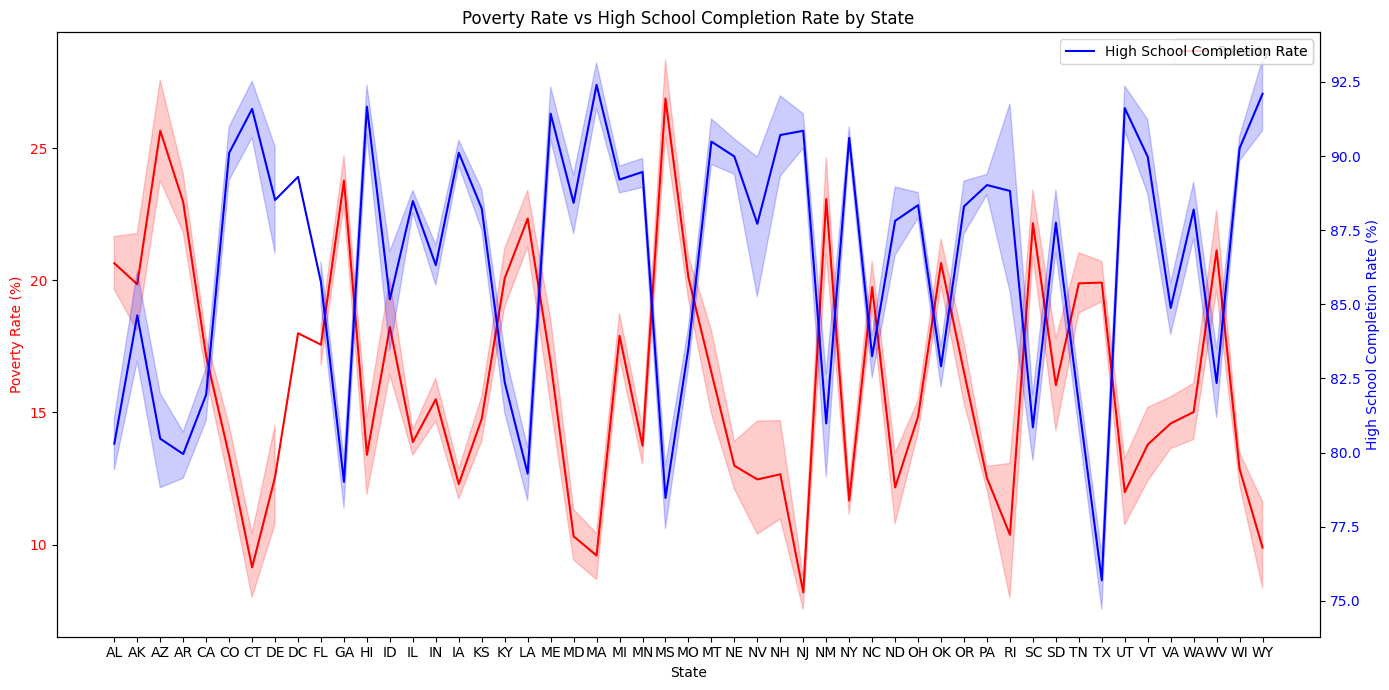

In [96]:
# a line chart with rations of poverty and high school graduation
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')
#plot two y axes to show the relationship between poverty and high school graduation without merging the dataframes
fig, ax1 = plt.subplots(figsize=(14, 7))
ax2 = ax1.twinx()
sns.lineplot(data=df_pct_poverty, x='Geographic Area', y='poverty_rate', ax=ax1, color='red', label='Poverty Rate')
sns.lineplot(data=df_pct_completed_hs, x='Geographic Area', y='percent_completed_hs', ax=ax2, color='blue', label='High School Completion Rate')
ax1.set_xlabel('State')
ax1.set_ylabel('Poverty Rate (%)', color='red')
ax2.set_ylabel('High School Completion Rate (%)', color='blue')
plt.title('Poverty Rate vs High School Completion Rate by State')
ax1.tick_params(axis='y', labelcolor='red')
ax2.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=90)
fig.tight_layout()
plt.show()






#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

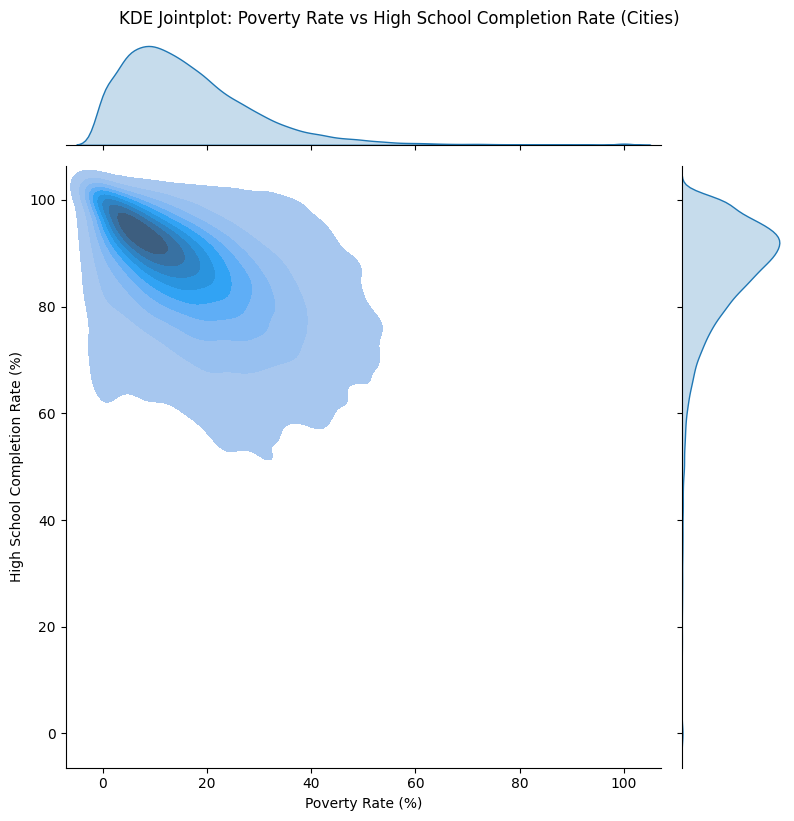

In [97]:
# Visualize the relationship between poverty rate and high school graduation rate using seaborn jointplot
sns.jointplot(
    data=df_pct_completed_hs.merge(df_pct_poverty, on=['Geographic Area', 'City']),
    x='poverty_rate',
    y='percent_completed_hs',
    kind='kde',
    fill=True,
    height=8
)
plt.xlabel('Poverty Rate (%)')
plt.ylabel('High School Completion Rate (%)')
plt.suptitle('KDE Jointplot: Poverty Rate vs High School Completion Rate (Cities)', y=1.02)
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

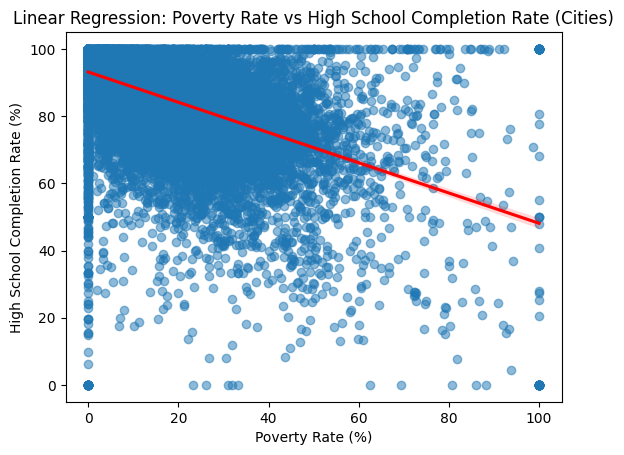

In [98]:
# Linear regression between poverty rate and high school graduation rate using seaborn regplot
merged_df = df_pct_completed_hs.merge(df_pct_poverty, on=['Geographic Area', 'City'])
sns.regplot(
    data=merged_df,
    x='poverty_rate',
    y='percent_completed_hs',
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)
plt.xlabel('Poverty Rate (%)')
plt.ylabel('High School Completion Rate (%)')
plt.title('Linear Regression: Poverty Rate vs High School Completion Rate (Cities)')
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [99]:
#bar chat with subsections  showing the racial makeup of each state
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


<Figure size 1400x1000 with 0 Axes>

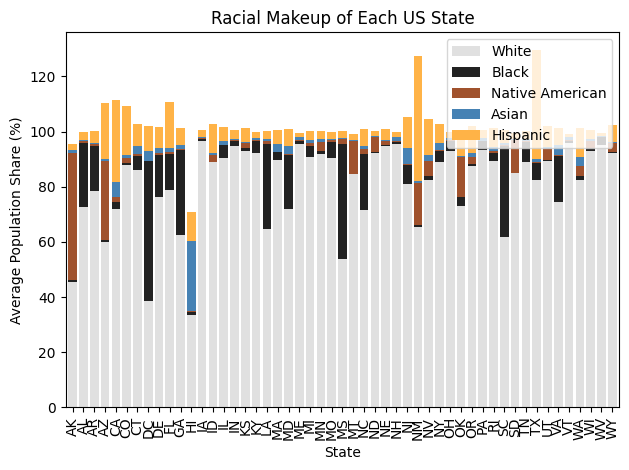

In [100]:
# Convert racial share columns to numeric
race_columns = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
for col in race_columns:
    df_share_race_city[col] = pd.to_numeric(df_share_race_city[col], errors='coerce')

# Group by state and calculate mean share for each race
state_race_share = df_share_race_city.groupby('Geographic area')[race_columns].mean()

# Plot stacked bar chart
plt.figure(figsize=(14, 10))
state_race_share.sort_index().plot(
    kind='bar',
    stacked=True,
    color=['#e0e0e0', '#222222', '#a0522d', '#4682b4', '#ffb347'],
    width=0.8
)
plt.title('Racial Makeup of Each US State')
plt.xlabel('State')
plt.ylabel('Average Population Share (%)')
plt.legend(['White', 'Black', 'Native American', 'Asian', 'Hispanic'], loc='upper right')
plt.tight_layout()
plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [101]:
#donut cart by of people killed by race
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


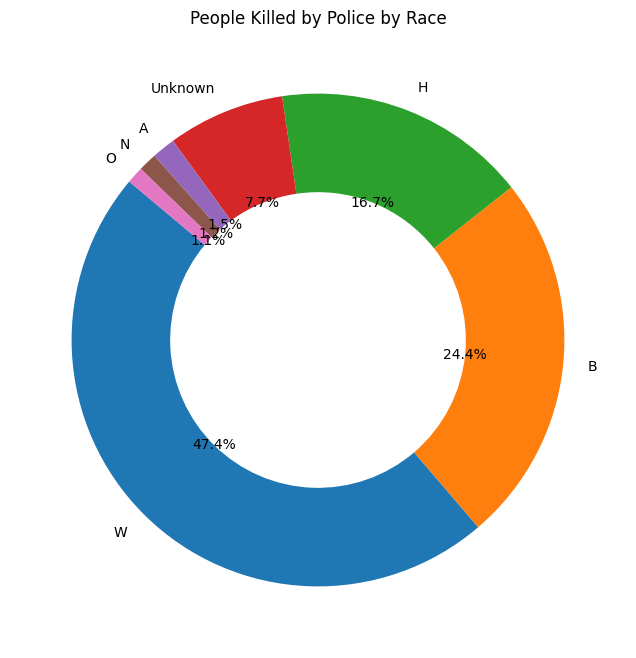

In [102]:
# Count number of people killed by race
race_counts = df_fatalities['race'].value_counts(dropna=False)

# Donut chart
plt.figure(figsize=(8, 8))
plt.pie(
    race_counts,
    labels=race_counts.index.fillna('Unknown'),
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'width': 0.4}
)
plt.title('People Killed by Police by Race')
plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [104]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


C:\Users\glubi\AppData\Local\Temp\ipykernel_16404\1098323160.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')


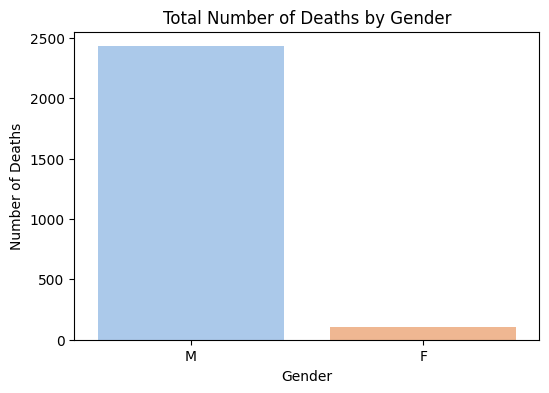

In [105]:
# Count total deaths by gender
gender_counts = df_fatalities['gender'].value_counts()

# Bar chart comparing deaths of men and women
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')
plt.title('Total Number of Deaths by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Deaths')
plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

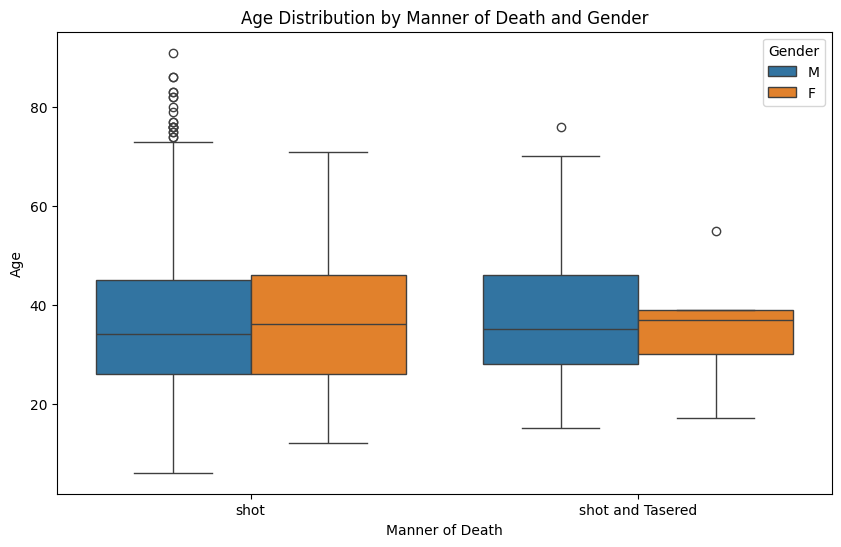

In [ ]:
# a box plot showing age distribution by manner of death, separated by gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_fatalities, x='manner_of_death', y='age', hue='gender')
plt.title('Age Distribution by Manner of Death and Gender')
plt.xlabel('Manner of Death')
plt.ylabel('Age')
plt.legend(title='Gender')
plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [108]:
# percentage of armed people killed by the police
armed_counts = df_fatalities['armed'].value_counts(dropna=False)
armed_percentage = (armed_counts / armed_counts.sum()) * 100
armed_percentage


armed
gun                                55.15
knife                              14.71
vehicle                             6.98
unarmed                             6.75
undetermined                        4.62
                                    ... 
straight edge razor                 0.04
baseball bat and fireplace poker    0.04
bean-bag gun                        0.04
chain                               0.04
pen                                 0.04
Name: count, Length: 69, dtype: float64

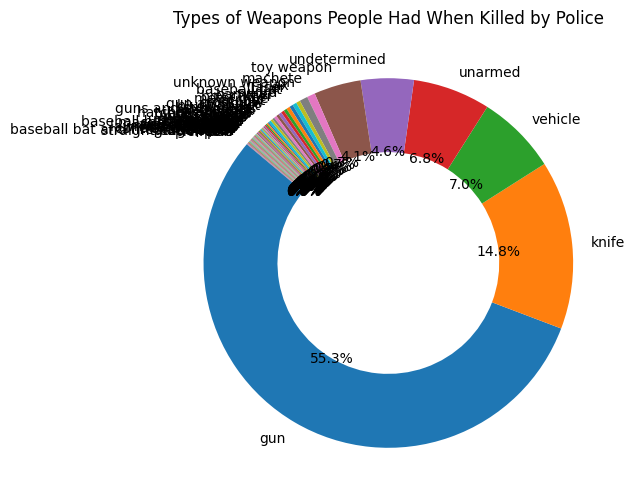

In [110]:
#create a chart that show what kind of weapons people had when they were killed by the police
# Create a donut chart showing the types of weapons people had when killed by police
plt.figure(figsize=(12, 6))
weapon_counts = df_fatalities['armed'].value_counts()
plt.pie(
    weapon_counts,
    labels=weapon_counts.index.fillna('Unknown'),
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'width': 0.4}
)
plt.title('Types of Weapons People Had When Killed by Police')
plt.show()

In [122]:
gun_count = armed_counts.get('gun', 0)
unarmed_count = armed_counts.get('unarmed', 0)
print(f"Number of people killed by police who were armed with guns: {gun_count}")
print(f"Number of people killed by police who were unarmed: {unarmed_count}")

Number of people killed by police who were armed with guns: 1398
Number of people killed by police who were unarmed: 171


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

In [114]:
#percentage of people killed who were under 25 years old
under_25_count = df_fatalities[df_fatalities['age'] < 25].shape[0]
total_count = df_fatalities.shape[0]
under_25_percentage = (under_25_count / total_count) * 100
print(f"Percentage of people killed by police who were under 25 years old: {under_25_percentage:.2f}%")




Percentage of people killed by police who were under 25 years old: 17.75%


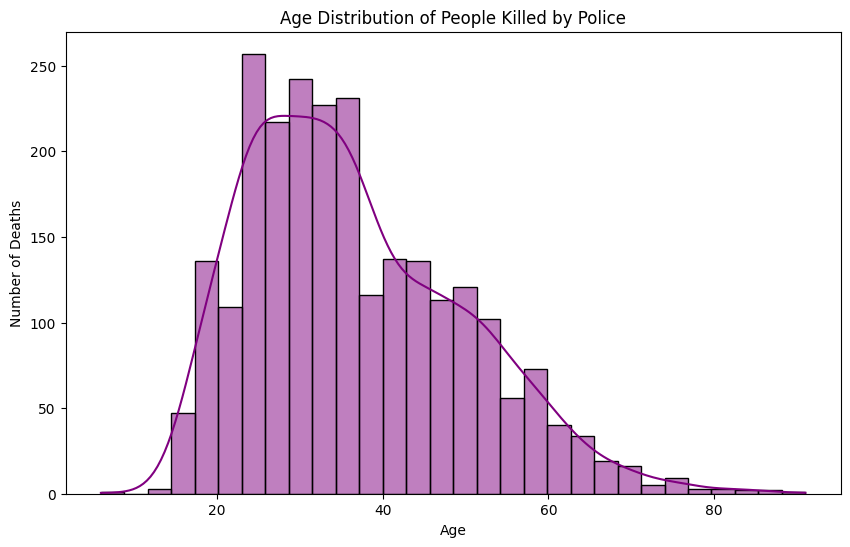

In [120]:
#a histogram plot showing zhe distribution of ages of people killed by the police
plt.figure(figsize=(10, 6))
sns.histplot(df_fatalities['age'].dropna(), bins=30, kde=True, color='purple')
plt.title('Age Distribution of People Killed by Police')
plt.xlabel('Age')
plt.ylabel('Number of Deaths')
plt.show()

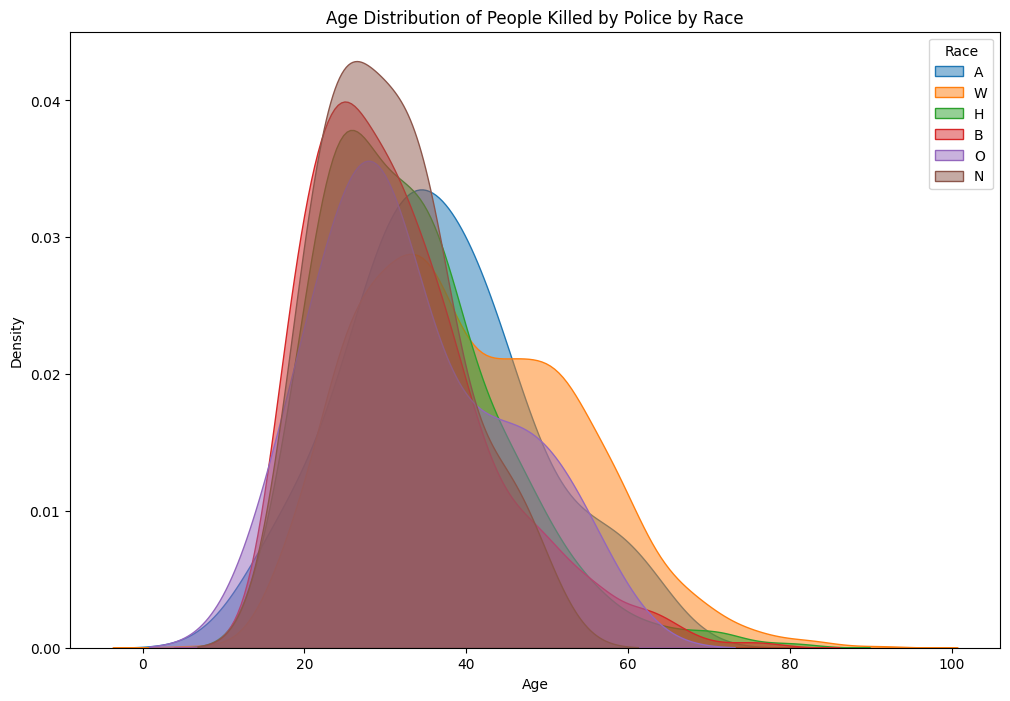

In [121]:
# KDE plot for age distribution by race
plt.figure(figsize=(12, 8))
races = df_fatalities['race'].dropna().unique()
for race in races:
    sns.kdeplot(
        df_fatalities[df_fatalities['race'] == race]['age'].dropna(),
        label=race,
        fill=True,
        alpha=0.5
    )
plt.title('Age Distribution of People Killed by Police by Race')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Race')
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

C:\Users\glubi\AppData\Local\Temp\ipykernel_16404\219189394.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=race_counts.index.fillna('Unknown'), y=race_counts.values, palette='Set2')


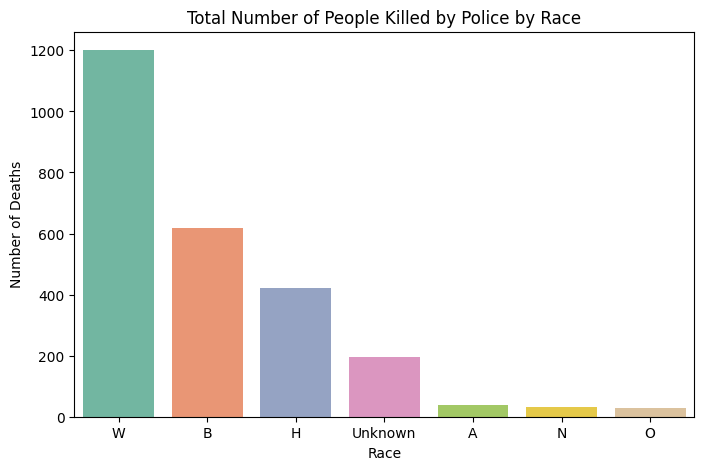

In [123]:
# Bar chart showing the total number of people killed by race
plt.figure(figsize=(8, 5))
sns.barplot(x=race_counts.index.fillna('Unknown'), y=race_counts.values, palette='Set2')
plt.title('Total Number of People Killed by Police by Race')
plt.xlabel('Race')
plt.ylabel('Number of Deaths')
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [124]:
# Calculate percentage of people killed by police diagnosed with a mental illness
mental_illness_count = df_fatalities['signs_of_mental_illness'].sum()
mental_illness_percentage = (mental_illness_count / total_count) * 100
print(f"Percentage of people killed by police diagnosed with a mental illness: {mental_illness_percentage:.2f}%")

Percentage of people killed by police diagnosed with a mental illness: 24.97%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [126]:
# a chart ranking the top 10 cities with the highest number of police killings
city_counts = df_fatalities['city'].value_counts().head(10)


C:\Users\glubi\AppData\Local\Temp\ipykernel_16404\3486096291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.values, y=city_counts.index, palette='coolwarm')


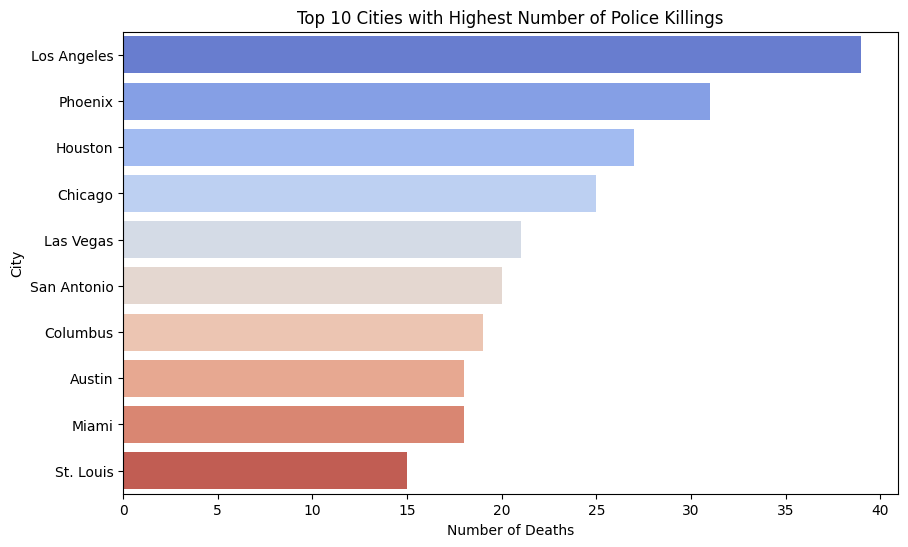

In [127]:
# Bar chart for top 10 cities with highest police killings
plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.values, y=city_counts.index, palette='coolwarm')
plt.title('Top 10 Cities with Highest Number of Police Killings')
plt.xlabel('Number of Deaths')
plt.ylabel('City')
plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).